# Fire Incidents by Neighborhood

## By Jacob Miller

### Data Set: Fire Incidents by Location
##### https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh


In [1]:
import geopandas as gpd
import pandas as pd

Neighborhoods = gpd.read_file('./Neighborhoods_.shp')

Neighborhoods.head(2)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."


Here is the data for Each of the Pittsburgh Neighborhoods with each neighborhood name being found under the "hood" column

In [2]:
import geopandas as gpd
import pandas as pd

#loading in Crime rates by location
fire_Data = gpd.read_file('./FireIncidents.shp')

fire_Data.head(2)

,census_tra,_id,call_no,incident_t,type_descr,address,alarm_time,alarms,primary_un,cartodb_id,...,council_di,ward,tract,public_wor,pli_divisi,police_zon,fire_zone,latitude,longitude,geometry
0,1914,139,F130022775,160.0,"Special outside fire, Other","ARLINGTON AVE & MCARDLE RDW, PITTSBURGH PA 15203",2013-04-04,0,231EN27,138,...,NaN,NaN,NaN,NaN,NaN,NaN,4-5,NaN,NaN,None
1,1302,23,F170043259,111.0,Building fire,"7100 BLOCK HERMITAGE ST, PITTSBURGH PA 15208",2017-05-30,1,231EN15,23,...,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-18,40.460658,-79.897486,POINT (-79.89749 40.46066)


Here is the data for Pittsburgh Fire incidents by Neighborhood

In [3]:
# Creating a new data frame for the fire incidents
fire_Data_DF = pd.DataFrame(columns = ["Neighborhood"])
fire_Data_DF["Neighborhood"] = fire_Data["neighborho"]

fire_Data_DF.head(2)

,Neighborhood
0,None
1,Homewood North


Now we will simplify the data so that we only see the Neighborhood, and its number of fire incidents

In [4]:
import geopandas as gpd
import pandas as pd

# Creating a new data frame for the neighborhoods
neighborhoods_DF = pd.DataFrame(columns = ["Neighborhood", "Incidents"])
neighborhoods_DF["Neighborhood"] = Neighborhoods["hood"]
neighborhoods_DF["Incidents"] = 0

neighborhoods_DF.head(2)

,Neighborhood,Incidents
0,Point Breeze North,0
1,Squirrel Hill North,0


Now we can iterate through the fire incidents to find out which neighborhoods have the most fire incidents

In [5]:
import geopandas as gpd
import pandas as pd

for i, row1 in neighborhoods_DF.iterrows():
    for j, row2 in fire_Data_DF.iterrows():
        if row1['Neighborhood'] == row2['Neighborhood']:
            neighborhoods_DF.at[i, 'Incidents'] += 1

neighborhoods_DF.head(5)

,Neighborhood,Incidents
0,Point Breeze North,33
1,Squirrel Hill North,84
2,Garfield,71
3,Bedford Dwellings,29
4,Knoxville,98


Now we can take this data and sort it based on number of incidents

In [6]:
fire_neighborhoods_sorted = neighborhoods_DF.sort_values("Incidents", ascending = True)

fire_neighborhoods_sorted.head()

,Neighborhood,Incidents
85,Regent Square,6
28,East Carnegie,6
67,Mt. Oliver,7
82,Swisshelm Park,7
18,Arlington Heights,7


We are now going to put the data into a graph a to make it easier to view

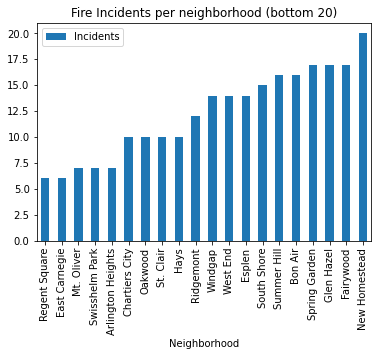

In [7]:
plt = fire_neighborhoods_sorted.iloc[:20].plot(kind = 'bar', x = "Neighborhood", y = "Incidents", title = "Fire Incidents per neighborhood (bottom 20)")

Now taking this data we can rank each neighborhood by number of fire incidents

In [8]:
fire_neighborhoods_sorted['rank'] = fire_neighborhoods_sorted['Incidents'].rank(method = 'min')

fire_neighborhoods_sorted.head()

,Neighborhood,Incidents,rank
85,Regent Square,6,1.0
28,East Carnegie,6,1.0
67,Mt. Oliver,7,3.0
82,Swisshelm Park,7,3.0
18,Arlington Heights,7,3.0


Based on this data set we can see that the top ranking nighborhood using the metric of least number of fire incidents is tied between Regent Square and East Carnegie who each had 6 incidents in this dataset